# Neural network regression model
### Import the libraries

This is my final upload for the first day. There are many 'useless' code cells. In the future, I will try to establish a connection or clusters between the brands and the price. I also observed that the engine plays a vital role in the price, so I will try to connect these elements and make better predictions based on some insights into the car business.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data

In [3]:
df = pd.read_csv("train.csv")
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


### Dealing with empty data

In [4]:
rows = df.shape[0]
print(f"Number of examples: {rows}")

Number of examples: 188533


### Getting to know the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


## Filling all empty information

In [6]:
df.fillna('missing', inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     188533 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      188533 non-null  object
 11  clean_title   188533 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


#### Average price by fuel

In [8]:
average_price_by_fuel_type = df.groupby('fuel_type')['price'].mean()


print("Average price by fuel type:")
print(average_price_by_fuel_type)

Average price by fuel type:
fuel_type
Diesel            48769.587358
E85 Flex Fuel     26729.755457
Gasoline          43360.013782
Hybrid            55473.451698
Plug-In Hybrid    44150.967370
missing           60822.612040
not supported     20692.733333
–                 36414.285531
Name: price, dtype: float64


c:\Users\ptren\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
c:\Users\ptren\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


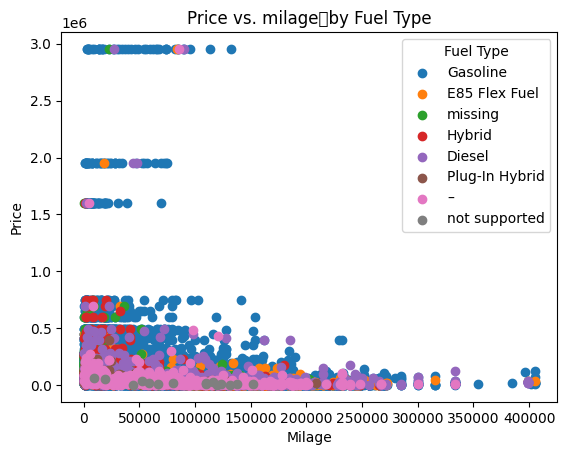

In [9]:
for fuel in df['fuel_type'].unique():
    fuel_data = df[df['fuel_type'] == fuel]
    plt.scatter(fuel_data['milage'], fuel_data['price'], label=fuel)

# Adding titles and labels
plt.title('Price vs. milage	by Fuel Type')
plt.xlabel('Milage')
plt.ylabel('Price')
plt.legend(title="Fuel Type")

## Encoding the labels

In [10]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
df['brand'] = label_encoder.fit_transform(df['brand'])
df['fuel_type'] = label_encoder.fit_transform(df['fuel_type'])
df['transmission'] = label_encoder.fit_transform(df['transmission'])
df['model'] = label_encoder.fit_transform(df['model'])
df['ext_col'] = label_encoder.fit_transform(df['ext_col'])
df['int_col'] = label_encoder.fit_transform(df['int_col'])
df['accident'] = label_encoder.fit_transform(df['accident'])
df['int_col'] = label_encoder.fit_transform(df['int_col'])
df['engine'] = label_encoder.fit_transform(df['engine'])
df['clean_title'] = label_encoder.fit_transform(df['clean_title'])


print("Label Encoded DataFrame:")
print(df)

Label Encoded DataFrame:
            id  brand  model  model_year  milage  fuel_type  engine  \
0            0     31    495        2007  213000          2     116   
1            1     28    930        2002  143250          2     366   
2            2      9   1575        2002  136731          1     640   
3            3     16    758        2017   19500          2     863   
4            4     36   1077        2021    7388          2     259   
...        ...    ...    ...         ...     ...        ...     ...   
188528  188528      8    604        2017   49000          2     866   
188529  188529     36    206        2018   28600          2     770   
188530  188530     36    223        2021   13650          2     921   
188531  188531      3   1471        2022   13895          2     512   
188532  188532     43   1028        2016   59500          2     364   

        transmission  ext_col  int_col  accident  clean_title  price  
0                 38      312       71         1   

## Splitting and Normalizing the data

In [21]:
from sklearn.model_selection import train_test_split
X = df.drop(['price', 'id'], axis=1)
y = df['price']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Model

In [57]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001), input_shape=[X_train.shape[1]]),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dense(1)  # Linear regression: 1 output node, no activation
])

In [61]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_schedule), 
              loss='mse', 
              metrics=['mae'])
# Early stopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32, 
    callbacks=[early_stopping]
)

Epoch 1/100
4714/4714 [==============================] - 9s 2ms/step - loss: 5590503424.0000 - mae: 20472.6367 - val_loss: 4062255872.0000 - val_mae: 20809.1016
Epoch 2/100
4714/4714 [==============================] - 8s 2ms/step - loss: 5596316672.0000 - mae: 20453.3555 - val_loss: 4044701696.0000 - val_mae: 20152.7441
Epoch 3/100
4714/4714 [==============================] - 8s 2ms/step - loss: 5583204864.0000 - mae: 20506.3164 - val_loss: 4032059904.0000 - val_mae: 18882.2402
Epoch 4/100
4714/4714 [==============================] - 8s 2ms/step - loss: 5590340608.0000 - mae: 20407.3848 - val_loss: 4035984640.0000 - val_mae: 19616.3184
Epoch 5/100
4714/4714 [==============================] - 7s 2ms/step - loss: 5586634240.0000 - mae: 20451.6406 - val_loss: 4029995776.0000 - val_mae: 19164.6113
Epoch 6/100
4714/4714 [==============================] - 7s 2ms/step - loss: 5581688832.0000 - mae: 20413.3750 - val_loss: 4030473984.0000 - val_mae: 19068.8438
Epoch 7/100
4714/4714 [===========

## Evaluate the model

590/590 [==============================] - 0s 707us/step - loss: 5452665344.0000 - mae: 19970.0215
Test MSE: 5452665344.0000
Test MAE: 19970.0215


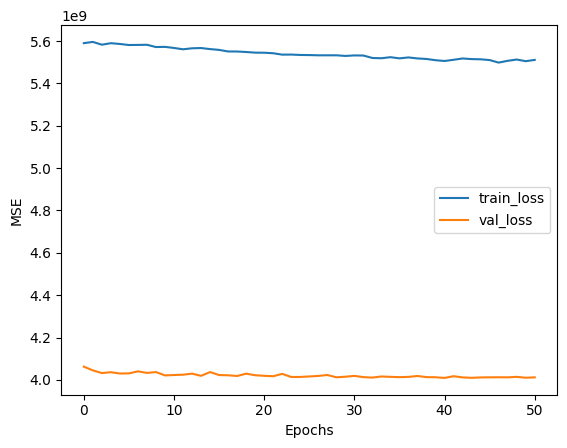

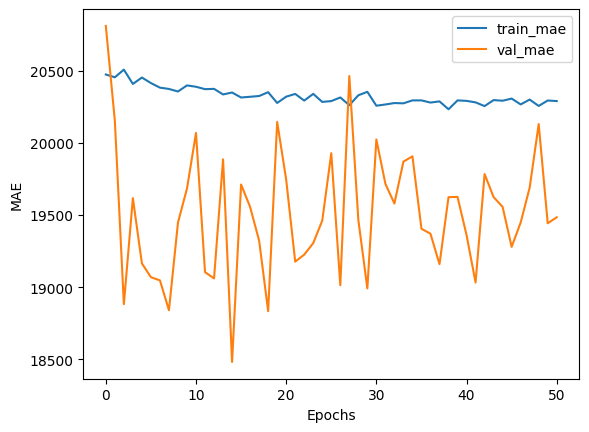

In [62]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MSE: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

# Plotting the training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

plt.plot(history.history['mae'], label='train_mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## Save the results

In [60]:
import pandas as pd

# Load the test dataset

test_df = pd.read_csv("test.csv")
numeric_df = test_df.select_dtypes(include=['number'])
non_numeric_df = test_df.select_dtypes(exclude=['number'])

# Optionally handle NaNs in non-numeric columns (e.g., with a specific value)
non_numeric_df = non_numeric_df.fillna('Missing')

# Combine the numeric and non-numeric DataFrames back together
test_df = pd.concat([numeric_df, non_numeric_df], axis=1)
# Handle the categorical encoding for the test set using the same encoder
test_df['brand'] = label_encoder.fit_transform(test_df['brand'])
test_df['fuel_type'] = label_encoder.fit_transform(test_df['fuel_type'])
test_df['transmission'] = label_encoder.fit_transform(test_df['transmission'])
test_df['model'] = label_encoder.fit_transform(test_df['model'])
test_df['ext_col'] = label_encoder.fit_transform(test_df['ext_col'])
test_df['int_col'] = label_encoder.fit_transform(test_df['int_col'])
test_df['accident'] = label_encoder.fit_transform(test_df['accident'])
test_df['int_col'] = label_encoder.fit_transform(test_df['int_col'])
test_df['engine'] = label_encoder.fit_transform(test_df['engine'])
test_df['clean_title'] = label_encoder.fit_transform(test_df['clean_title'])

# Drop any columns not needed for prediction
X_test_pred = test_df.drop(['id'], axis=1)

# Normalize the test data using the same scaler
X_test_pred = scaler.fit_transform(X_test_pred)

# Make predictions on the test data
predictions = model.predict(X_test_pred)

# Prepare a DataFrame to save the results
results = pd.DataFrame({
    'id': test_df['id'],
    'price': predictions.flatten()
})

# Save the results to a CSV file
results.to_csv("prediction_nn.csv", index=False)

3928/3928 [==============================] - 3s 638us/step
